In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.odr import * 

In [2]:
data = pd.read_csv('isocro.csv', header = 0)
data.tail()

,Full,log(Age),M,log(Teff),Mbol,Mv,(U-B)o,(B-V)o,(V-R)o,(V-I)o,(V-J)o
6556,6557,6.6,51.8303,4.306,-9.88,-7.96,-0.88,-0.21,-0.09,-0.21,-0.51
6557,6558,6.6,51.8353,4.238,-9.89,-8.36,-0.81,-0.18,-0.06,-0.16,-0.42
6558,6559,6.6,51.8403,4.173,-9.90,-8.73,-0.69,-0.16,-0.05,-0.12,-0.33
6559,6560,6.6,51.8453,4.069,-9.92,-9.32,-0.44,-0.12,-0.02,-0.05,-0.19
6560,6561,6.6,51.8503,3.980,-9.93,-9.75,-0.21,-0.05,0.01,0.02,-0.02


In [3]:
idades = data['log(Age)']
age = np.array([])
for element in idades:
    if element in age:
        continue
    elif element not in age:
        age = np.append(age,element)

list_dataframes = []
for element in age:
    list_dataframes.append(data[data['log(Age)']==element])

In [4]:
x=[]
y=[]
for i in list_dataframes:
    y.append(i['Mv'])
    x.append(i['(B-V)o'])
    

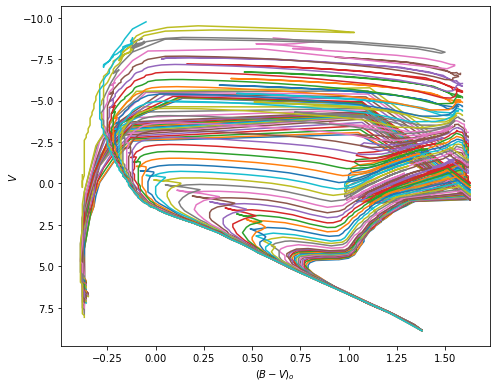

In [5]:
plt.figure(figsize=(7,5.5))
plt.gca().invert_yaxis()
for a,b in zip(x,y):
    plt.plot(a, b)
    plt.xlabel(r"$( B-V)_o$")
    plt.ylabel(r"$V$")
    plt.tight_layout()


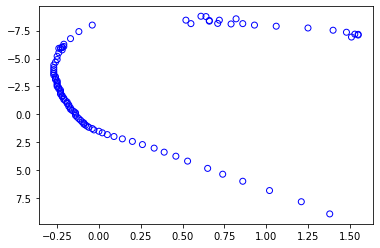

In [16]:
nova = data[data['log(Age)']==6.9]
Mv = nova['Mv']
x = nova['(B-V)o'] 
plt.gca().invert_yaxis()
plt.scatter(x,Mv, color = 'none', edgecolor = 'blue')
#plt.plot(x,y, '--')

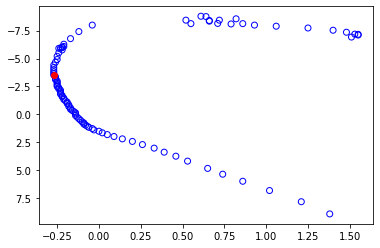

In [66]:
lx = x.tolist()
ly = Mv.tolist()

i = 0
index = 0

for element in lx:
    if i>= 1:
        if lx[i-1] - element <0:
            index = i-1
            break
    i+=1

valor = lx[index]
i = 0
for element in lx:
    if element == valor:
        index = i
        break
    i+=1

plt.gca().invert_yaxis()
plt.scatter(lx[index], ly[index], color = 'red', zorder = 100)
plt.scatter(x,Mv, color = 'none', edgecolor = 'blue')


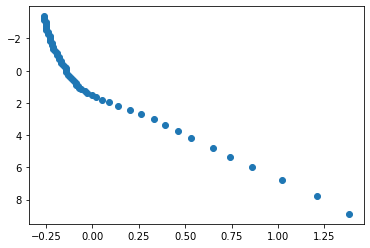

In [18]:
x1 = lx[:index]
y1 = ly[:index]
plt.gca().invert_yaxis()
plt.scatter(x1,y1)

In [21]:
from scipy import stats

result = stats.linregress(x1,y1)

result.slope, result.rvalue

(7.002132699825253, 0.9468337004366304)